## Хамикоева ПИ19-3 Классификация текстов

### Задания для выполнения
1) Загрузите датасет 20 newsgroups;

2) Познакомьтесь с описанием и структурой датасета.

3) Выведите информацию о количественных параметрах датасета;

4) Выведите несколько точек датасета (сами текстовые фрагменты и значение целевой переменной);

5) Разделите эти данные на тестовую и обучающую выборки;

6) Постройте модель наивного байесовского для классификации текстов;

7) Оцените качество модели на тестовой выборке с помощью следующих метрик:
 * достоверность предсказания (accuracy);
 * точность (precision);
 * полнота (recall);

8) Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки.

9) Сделайте вывод о применимости модели.

In [1]:
# Здесь мы располагаем все импорты
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import learning_curve

In [2]:
# далее подгружаем необходимый датасет, 
# который в последующем потребуется нам для обучения методам классификации текстов на естественных языках
news = fetch_20newsgroups(subset='all')

In [3]:
# теперь нам нужно познакомиться с описанием и структурой датасета, для чего используем:
print(news.target_names) # выводим перечень имен
print(news.DESCR) # полное описание

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extracti

In [4]:
# далее нас просят вывести информацию о количественных параметрах датасета
print("Ключи: ", list([_ for _ in news.keys()])) # перечень возможных параметров, которые нам что-то скажут о датасете
print("Всего образцов и функций:", len(news.data)) # теперь будем пользоваться ключами из перечня
print("Количество файлов: ", len(news.filenames))
print("Целевые метки:", news.target)
print("Целевые метки уникальные:", set(news.target))
print("Количество целевых меток:", len(news.target))
print("Количество уникальных целевых меток:", len(set(news.target)))

Ключи:  ['data', 'filenames', 'target_names', 'target', 'DESCR']
Всего образцов и функций: 18846
Количество файлов:  18846
Целевые метки: [10  3 17 ...  3  1  7]
Целевые метки уникальные: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
Количество целевых меток: 18846
Количество уникальных целевых меток: 20


In [5]:
# Чтобы вывести несколько точек датасета (сами текстовые фрагменты и значение целевой переменной), следует пройтись циклом:
for i in range(5):
    print(f'Точка номер {i}')
    print((news.data[i].replace("\n\n\n", "\n")))

Точка номер 0
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu

I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!


Точка номер 1
From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)
Subject: Which 

In [6]:
# Мы посмотрели наш датасет, и теперь нужно разделить данные на тестовую и обучающую выборки.
# Воспользуемся train_test_split (все import_ы выписываем в первую ячейку, чтобы потом можно было посмотреть, что используется в лабе)
# Делим с соотношением 80/20
X_train, X_test, y_train, y_test = train_test_split(news.data, news.target, test_size=0.2, random_state=True)

In [7]:
# Для классификации текстов рекомендовано использовать модель наивного байесовского классификатора
# CountVectorizer помогает в реализации токенизации и подсчете вхождений в одном классе. Запишем в переменную:
vectorizer = CountVectorizer()
# Теперь используем его для токенизации и подсчета вхождений слов в нашем корпусе текстовых документов обучающей выборки:
transform_x_train = vectorizer.fit_transform(X_train)
transform_x_train

<15076x159262 sparse matrix of type '<class 'numpy.int64'>'
	with 2385308 stored elements in Compressed Sparse Row format>

In [8]:
# Преобразовываем в матрицу векторов
X_test_trans = vectorizer.transform(X_test)
X_test_trans.toarray()

array([[0, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
# Импортируем необходимые библиотеки и записываем в переменную класс (создаем модель)
model = MultinomialNB()

# подгоняем (обучаем) модель
model.fit(transform_x_train, y_train)

# Выполняем классификацию по массиву тестовых векторов X
y_pred = model.predict(X_test_trans)

# Посмотрим основные метрики классификации в отчете
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       161
           1       0.66      0.90      0.76       193
           2       0.80      0.08      0.14       205
           3       0.64      0.87      0.74       213
           4       0.87      0.84      0.86       189
           5       0.66      0.86      0.75       188
           6       0.95      0.64      0.77       201
           7       0.89      0.88      0.88       202
           8       0.94      0.93      0.94       203
           9       0.94      0.96      0.95       185
          10       1.00      0.97      0.98       218
          11       0.82      0.95      0.88       207
          12       0.83      0.81      0.82       181
          13       0.92      0.91      0.91       195
          14       0.95      0.97      0.96       204
          15       0.85      0.96      0.90       208
          16       0.84      0.92      0.88       185
          17       0.93    

##### Показатели метрики достаточно высокие, что указывает на применимость модели, однако дополнительно построим графическую форму.

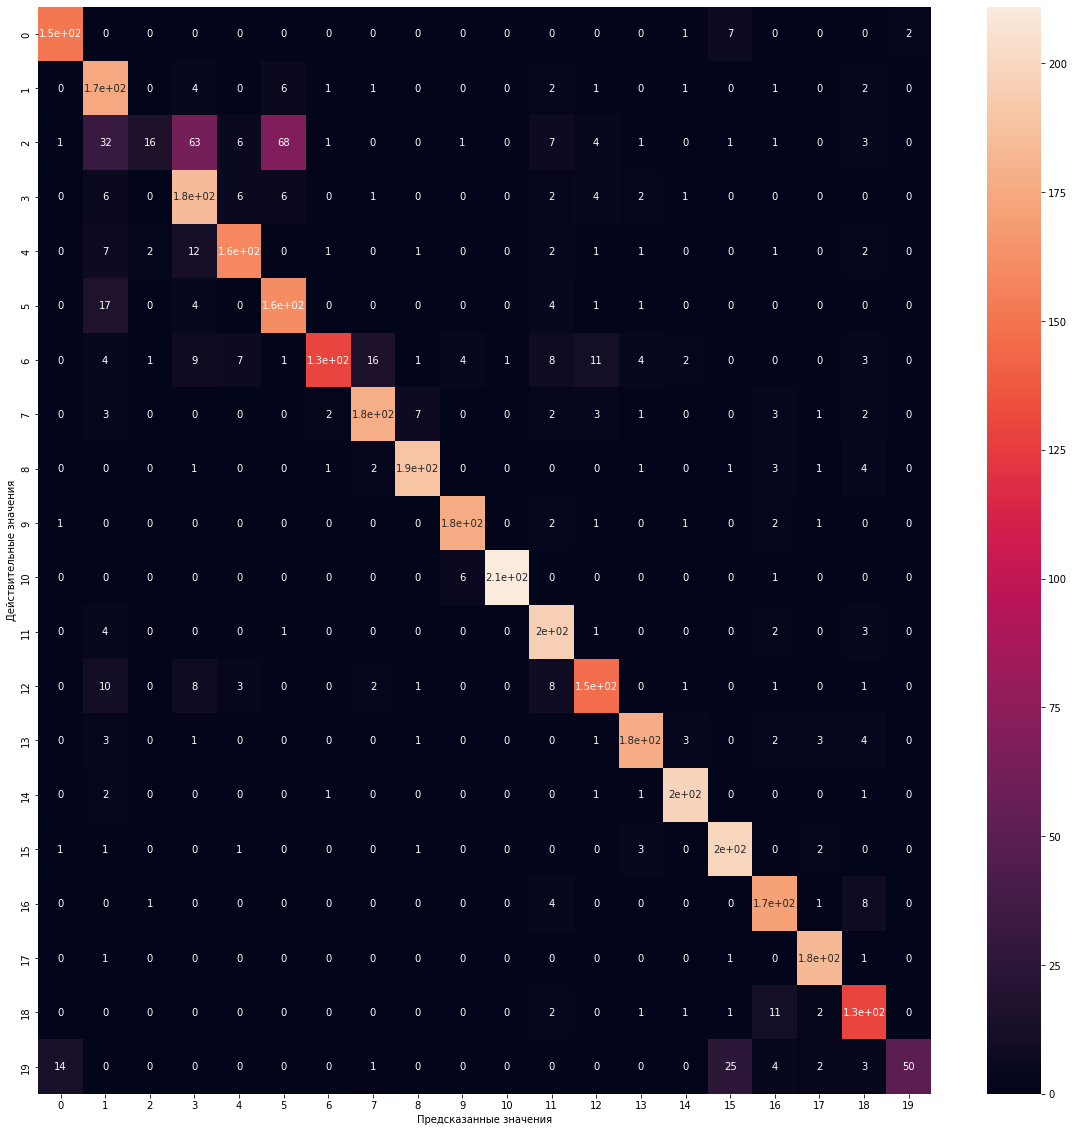

In [10]:
%matplotlib inline
 
class_names = [0, 1]
fig, ax = plt.subplots(figsize=(20, 20))
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)),annot=True)
plt.ylabel('Действительные значения')
_ = plt.xlabel('Предсказанные значения')

##### На главной диагонали стоят правильные ("хорошие") ответы модели, здесь их достаточно много. А вокруг диагонали мало ошибочных ответов. Это означает, что модель хорошая, она применима.

In [11]:
# Теперь прибегнем к построению кривой обучения 
# Необходимо рассмотреть график зависимости тестовой и обучающей эффективности от размера обучающей выборки

# Для начала сгенерируем кривую обучения
# Кривая обучения определяет перекрестную проверку результатов обучения и тестов для разных размеров обучающей выборки
sizes = np.linspace(0.01, 1.0, 50)
train_size, train_scores, validation_scores = learning_curve(MultinomialNB(), transform_x_train, y_train,
                                                           train_sizes = sizes, cv = 5)

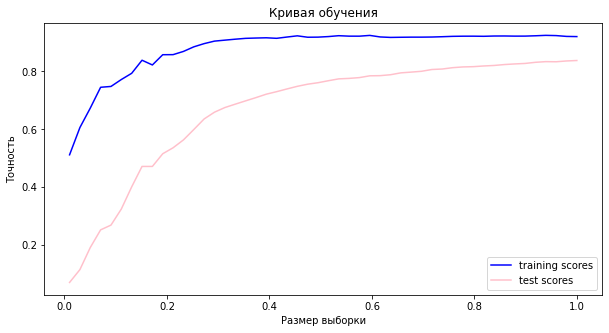

In [12]:
# Далее визуализируем кривую обучения
plt.figure(figsize=(10, 5))
plt.plot(sizes, np.average(train_scores, axis = 1), color = 'blue', label="training scores")
plt.plot(sizes, np.average(validation_scores, axis = 1), color = 'pink', label="test scores")
plt.title('Кривая обучения')
plt.xlabel('Размер выборки')
plt.ylabel('Точность')
plt.legend(loc = "best")
plt.show()

### Вывод о применимости модели:
 По итогам высоких показателей метрик, графической форме в виде таблицы, а таже по графику зависимостей  тестовой и обучающей эффективности от размера обучающей выборки (точность возрастает) можно сделать вывод, что модель в целом применима.